In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
from astropy.visualization.hist import hist as fancyhist
from sklearn.neighbors import KernelDensity

### Generating $\chi$ and $M$ samples
$\chi$ is the spin and is distributed uniformly, betweeen 0 and 1. The mass $M$ is distributed Gaussianly with given $\mu$ and $\sigma$.
Let's create some samples.

[Text(0.5, 0, '$M$'), Text(0, 0.5, 'p($M$)'), Text(0.5, 1.0, '$M$ histogram')]

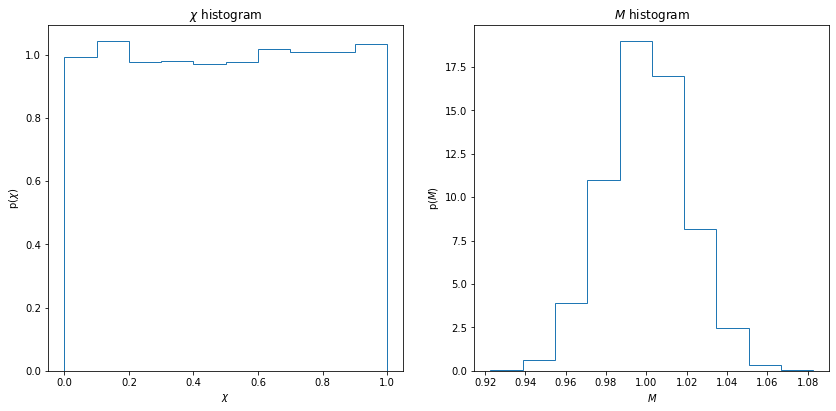

In [28]:
Nsamples = 10000

chi = np.random.uniform(0, 1, Nsamples)

mean = 1
sigma = 0.02
mass = np.random.normal (mean, sigma, Nsamples)

fig = plt.figure(figsize=(14, 14))

ax = fig.add_subplot(221)
ax.hist (chi, histtype='step', density = True)
ax.set(xlabel = '$\chi$', ylabel = 'p($\chi$)', title = '$\chi$ histogram')

ax = fig.add_subplot(222)
ax.hist(mass, histtype='step', density = True)
ax.set(xlabel = '$M$', ylabel = 'p($M$)', title = '$M$ histogram')

### Irreducible mass samples + KDE
Obtained by using the samples of chi and the mass, then using sklearn to plot a KDE with Gaussian kernels.

In [29]:
def get_M_irr (chi, mass):
    m_irr = mass * np.sqrt(0.5 * (1 + np.sqrt(1 - np.power(chi, 2))))
    return m_irr

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(m_irr[:, np.newaxis]) # sklearn returns log(density)
    return np.exp(log_pdf) 

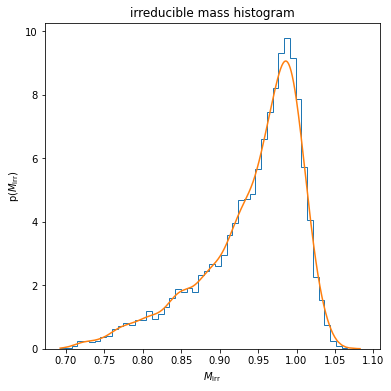

In [30]:
m_irr = get_M_irr(chi, mass)

_ = fancyhist(m_irr, bins="freedman", histtype="step",density=True)
plt.title('irreducible mass histogram')
plt.xlabel('$M_\mathrm{irr}$')
plt.ylabel('p($M_\mathrm{irr}$)')

m_irr.sort()
gauss_pdf = kde_sklearn(m_irr,bandwidth=0.01,kernel="gaussian")
plt.plot(m_irr, gauss_pdf)

### Redoing previous step by changing $\sigma$
In particular, by looking at the small and large limit of $\sigma$ to visualise the trend of the irreducible mass.

In [31]:
def chi_mass_samples (N, mean, sigma):
    chi = np.random.uniform(0, 1, N)
    mass = np.random.normal(mean, sigma, N)
    return chi, mass

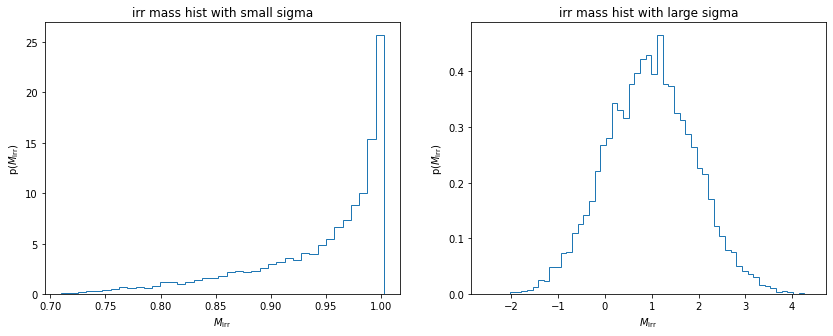

In [47]:
small_sigma = 0.001
large_sigma = 1

fig = plt.figure(figsize=(14, 5))

schi, smass = chi_mass_samples(Nsamples, mean, small_sigma)
s_m_irr = get_M_irr(schi, smass)
s_m_irr.sort()
#s_gauss_pdf = kde_sklearn(s_m_irr,bandwidth=0.01,kernel="gaussian")

ax = fig.add_subplot(121)
_ = fancyhist(s_m_irr, bins="freedman", histtype="step",density=True)
#ax.plot(s_m_irr, s_gauss_pdf)
ax.set(xlabel='$M_\mathrm{irr}$', ylabel = 'p($M_\mathrm{irr}$)', title = 'irr mass hist with small sigma')

lchi, lmass = chi_mass_samples(Nsamples, mean, large_sigma)
l_m_irr = get_M_irr(lchi, lmass)
l_m_irr.sort()
#l_gauss_pdf = kde_sklearn(l_m_irr,bandwidth=0.001,kernel="tophat")

ax = fig.add_subplot(122)
_ = fancyhist(l_m_irr, bins="freedman", histtype="step",density=True)
#ax.plot(l_m_irr, l_gauss_pdf)
ax.set(xlabel='$M_\mathrm{irr}$', ylabel = 'p($M_\mathrm{irr}$)', title = 'irr mass hist with large sigma')

plt.show()

With small sigmas, the irreducible mass seems to be distributed just like the initial one, while for large sigmas we get a gaussian that resembles the one of the mass.